# Project Name -
AirBnb Bookings Analysis


# GitHub Link -
https://github.com/svenkatesh345/AirBnb-Booking-Analysis.git


# Problem Statement
The growth of short-term rental platforms like Airbnb has significantly impacted the hospitality industry, especially in major cities like New York. Understanding the patterns, trends, and factors influencing Airbnb listings can help hosts optimize their offerings, assist policymakers in regulating the market, and guide travelers in making informed decisions.

The Airbnb NYC 2019 dataset contains detailed information about listings, including location, price, room type, availability, and host details. However, the raw data alone does not provide actionable insights.

The goal of this EDA is to:

Explore the distribution and characteristics of Airbnb listings across New York City boroughs.

Identify pricing patterns and factors influencing price variations.

Analyze host activity and availability trends.

Detect potential anomalies or outliers in the dataset.

Visualize spatial patterns to understand neighborhood-level dynamics.


#Business Context

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.

In [23]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Reading the Dataset file using pandas lib
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone/Airbnb NYC 2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [25]:
df.isnull().sum() #checking the null values in each column

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [26]:
df.drop(["name","latitude","longitude","host_name", "last_review"], axis =1, inplace = True)  # dropping  the  name, latitude, longitude, host_name, last_review columns which are not important
df.head()



,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [27]:
df["reviews_per_month"].fillna(0, inplace = True)  # imputing the NaN values with 0 as there are no reviews for the record
df.isnull().sum()  # reverifying the null values

/tmp/ipython-input-4250052484.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(0, inplace = True)  # imputing the NaN values with 0 as there are no reviews for the record


,0
id,0
host_id,0
neighbourhood_group,0
neighbourhood,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,0
calculated_host_listings_count,0


In [28]:
#examining the unique values of neighbourhood_group
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [29]:
#examining the unique values of neighbourhood
len(df.neighbourhood.unique())


221

In [30]:
#examining the unique values of room_type
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Exploring and Visualizing Data

In [31]:
#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=df.host_id.value_counts().head(10).reset_index()
#top_host.rename(columns={"index":"host_id", 'host_id': "p_count"}, inplace = True)
top_host

,host_id,count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


/tmp/ipython-input-1491883509.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  vis1.set_xticklabels(vis1.get_xticklabels(), rotation=45)


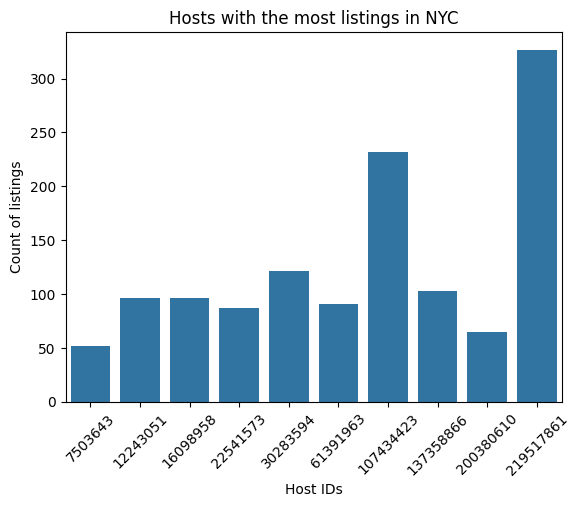

In [32]:
#bar plot to show the top 10 host_id
vis1 = sns.barplot(x ='host_id', y= 'count',data = top_host )
vis1.set_title('Hosts with the most listings in NYC')
vis1.set_xlabel("Host IDs")
vis1.set_ylabel("Count of listings")
vis1.set_xticklabels(vis1.get_xticklabels(), rotation=45)
plt.show()

We can see that that in the above graph , top host has more than 300+ hostings

In [33]:
neighbourhood_price = pd.DataFrame(df.groupby("neighbourhood_group")["price"].mean().reset_index(name="avg_price"))
neighbourhood_price

,neighbourhood_group,avg_price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


/tmp/ipython-input-3911806253.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  vis1.set_xticklabels(vis1.get_xticklabels(), rotation=45)


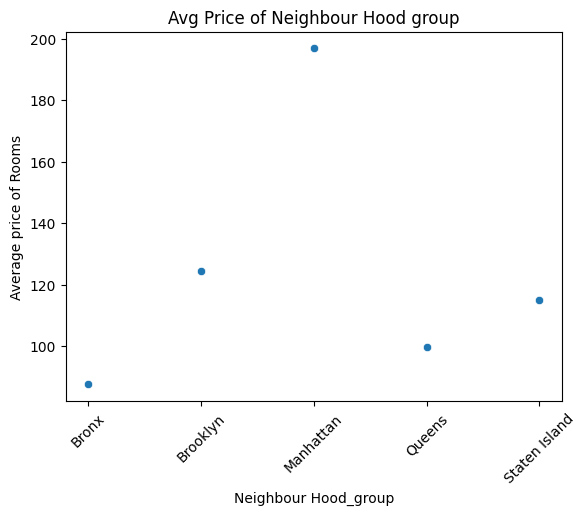

In [34]:
#scatter plot to show the avg price of Neighbour Hood group
vis1 = sns.scatterplot(x ='neighbourhood_group', y= 'avg_price',data = neighbourhood_price )
vis1.set_title('Avg Price of Neighbour Hood group')
vis1.set_xlabel("Neighbour Hood_group")
vis1.set_ylabel("Average price of Rooms")
vis1.set_xticklabels(vis1.get_xticklabels(), rotation=45)
plt.show()

We can see that Average price of the room is high in Manhattan while least in Bronx

In [35]:
neighbourhood_g_host = pd.DataFrame(df.groupby("neighbourhood_group")["calculated_host_listings_count"].sum().reset_index(name="host_count"))
neighbourhood_g_host

,neighbourhood_group,host_count
0,Bronx,2437
1,Brooklyn,45925
2,Manhattan,277073
3,Queens,23005
4,Staten Island,865


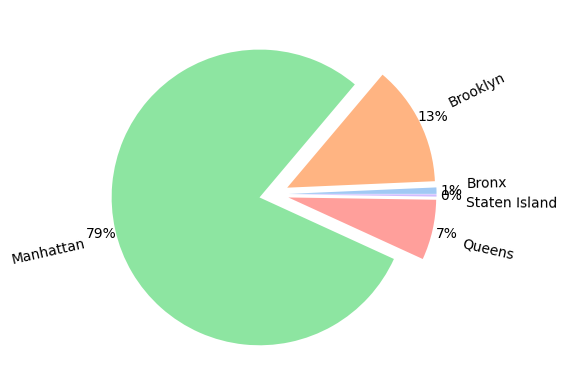

In [36]:
#plot pie chart to show the neighbour hood group host listing count
colors = sns.color_palette('pastel')[0:6]
plt.pie(neighbourhood_g_host['host_count'], labels =neighbourhood_g_host['neighbourhood_group'],labeldistance=1.2,rotatelabels=True,pctdistance=1.1,colors = colors, autopct='%.0f%%',explode = (0.1,0.1,0.1,0.1,0.1))
plt.show()

We can see that from above pie chart that the Manhattan has almost 79% of the host listings. And we got to know the average price of rooms also hugher in manhattan. Hence we can conclude that
Manhatta has more demand for the  Bookings.

In [37]:
df.neighbourhood.value_counts().head(10)

,count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564


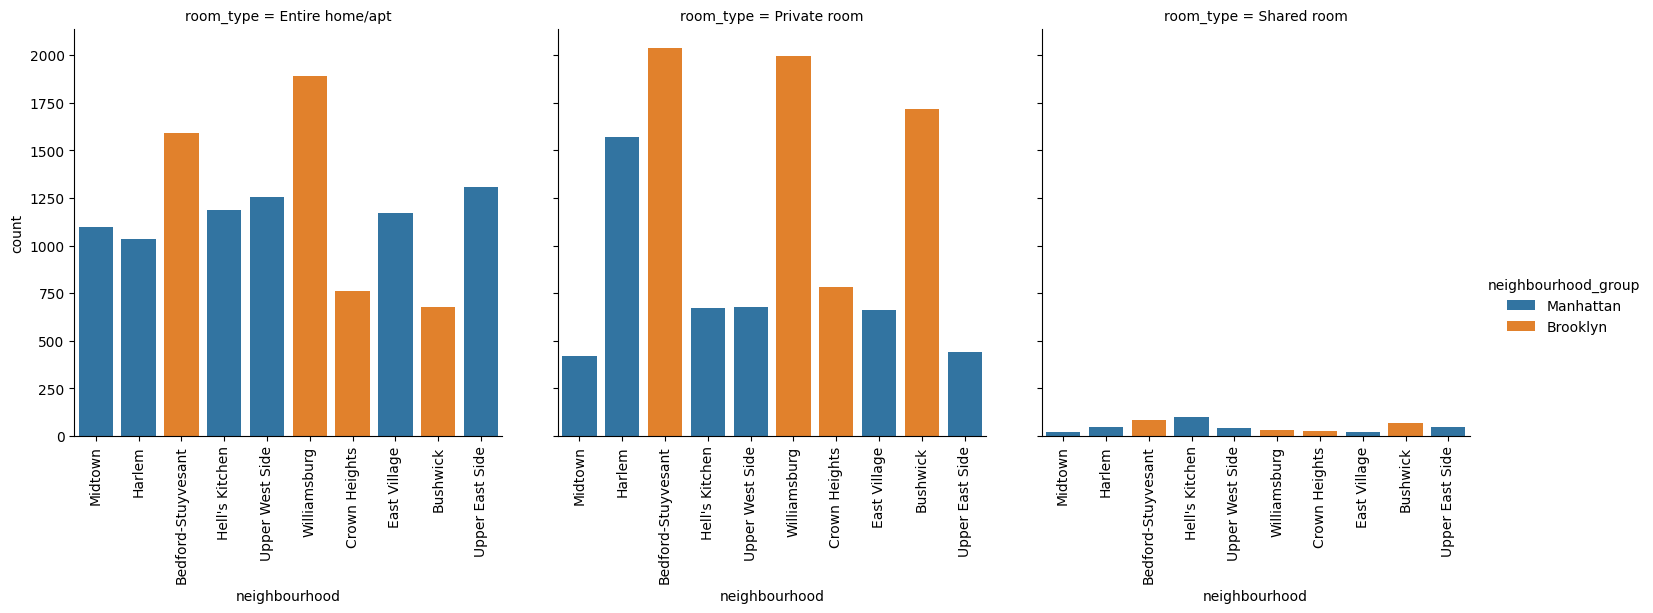

In [38]:
#Catplot to show the data for neighbourhood wrt host listings and room type
sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

In [39]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


/tmp/ipython-input-1759685503.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_3.set_xticklabels(viz_3.get_xticklabels(), rotation=45)


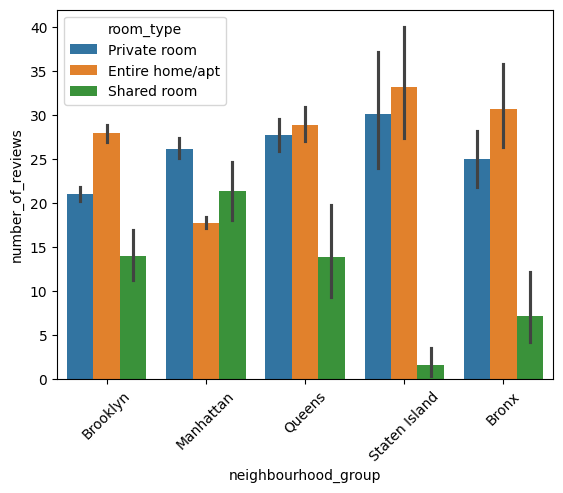

In [40]:
#using clustered bar plot to show the data for neighbourhood group wrt host no of reviews and room type
viz_3=sns.barplot(x='neighbourhood_group', hue='room_type', y='number_of_reviews', data=df)
viz_3.set_xticklabels(viz_3.get_xticklabels(), rotation=45)
plt.show()

In [41]:
no_reviews = pd.DataFrame(df.groupby("neighbourhood_group")["number_of_reviews"].sum().reset_index(name="no_reviews"))
no_reviews

,neighbourhood_group,no_reviews
0,Bronx,28371
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


/tmp/ipython-input-1556504351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data = no_reviews, x= "neighbourhood_group" ,y= "no_reviews", palette= "deep")


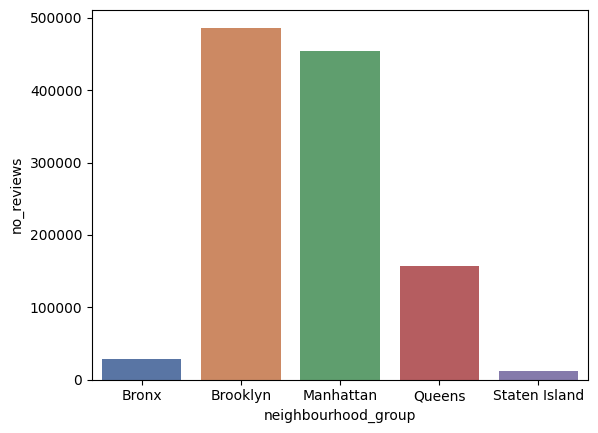

In [42]:
#bar plot to show the neighbourhood group wrt no of reviewa
sns.barplot( data = no_reviews, x= "neighbourhood_group" ,y= "no_reviews", palette= "deep")
plt.show()

We can observe that Brooklyn and Manhattan has highest number of reviews and staten Island has least number of reviews

**Conclusion:**
This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another. Lastly, we found the most reviewed listings and analyzed some additional attributes. For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on Airbnb Data/Machine Learning team for better business decisions, control over the platform, marketing initiatives, implementation of new features and much more. Therefore, I hope this kernel helps everyone!